# 数据归一化
- 数据的衡量尺度不同，导致数据权重出现偏差
- 解决方案：将所有的数据映射到同一尺度

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 最值归一化（normalization）
把所有数据映射到0-1之间

$$x_{scale} = \frac{x - x_{min}}{x_{max} - x_{min}}$$

适用于分布有明显边界的情况；受outlier影响比较大

In [2]:
x = np.random.randint(0, 100, size=100)
x

array([47,  2, 36, 54, 87, 10, 65, 98,  5, 57, 71, 30, 42, 87, 11, 99, 71,
       55, 32, 40, 33,  7, 42, 62, 42, 98, 32,  4, 57, 94, 95, 54, 44, 10,
       41,  5, 25, 15, 98, 51,  2, 30, 23, 49, 15, 21, 25, 40, 45, 33, 42,
       89, 73, 47,  5, 30, 83, 67, 67, 89, 30, 95, 82, 69, 57, 62,  0, 97,
        0, 30, 78, 36, 84, 32, 13, 97, 51, 26, 74, 57, 53, 81,  7, 69, 31,
        7, 33, 24, 28, 14, 39, 57, 51, 20, 67, 28, 53, 91, 10, 16])

In [3]:
(x - np.min(x)) / (np.max(x) - np.min(x))

array([0.47474747, 0.02020202, 0.36363636, 0.54545455, 0.87878788,
       0.1010101 , 0.65656566, 0.98989899, 0.05050505, 0.57575758,
       0.71717172, 0.3030303 , 0.42424242, 0.87878788, 0.11111111,
       1.        , 0.71717172, 0.55555556, 0.32323232, 0.4040404 ,
       0.33333333, 0.07070707, 0.42424242, 0.62626263, 0.42424242,
       0.98989899, 0.32323232, 0.04040404, 0.57575758, 0.94949495,
       0.95959596, 0.54545455, 0.44444444, 0.1010101 , 0.41414141,
       0.05050505, 0.25252525, 0.15151515, 0.98989899, 0.51515152,
       0.02020202, 0.3030303 , 0.23232323, 0.49494949, 0.15151515,
       0.21212121, 0.25252525, 0.4040404 , 0.45454545, 0.33333333,
       0.42424242, 0.8989899 , 0.73737374, 0.47474747, 0.05050505,
       0.3030303 , 0.83838384, 0.67676768, 0.67676768, 0.8989899 ,
       0.3030303 , 0.95959596, 0.82828283, 0.6969697 , 0.57575758,
       0.62626263, 0.        , 0.97979798, 0.        , 0.3030303 ,
       0.78787879, 0.36363636, 0.84848485, 0.32323232, 0.13131

In [4]:
X = np.random.randint(0, 100, size=(50, 2))
X = np.array(X, dtype=np.float)
X[:10,:]

array([[24., 70.],
       [55., 11.],
       [28.,  3.],
       [70., 58.],
       [22., 25.],
       [38.,  6.],
       [16.,  2.],
       [77., 59.],
       [ 1., 27.],
       [19., 22.]])

In [5]:
X[:,0] = (X[:,0] - np.min(X[:,0])) / (np.max(X[:,0]) - np.min(X[:,0]))
X[:,1] = (X[:,1] - np.min(X[:,1])) / (np.max(X[:,1]) - np.min(X[:,1]))
X[:10,:]

array([[0.24468085, 0.73684211],
       [0.57446809, 0.11578947],
       [0.28723404, 0.03157895],
       [0.73404255, 0.61052632],
       [0.22340426, 0.26315789],
       [0.39361702, 0.06315789],
       [0.15957447, 0.02105263],
       [0.80851064, 0.62105263],
       [0.        , 0.28421053],
       [0.19148936, 0.23157895]])

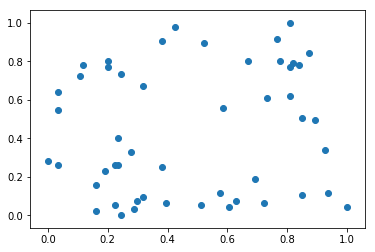

In [6]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [7]:
np.mean(X[:,0])

0.4785106382978724

In [8]:
np.std(X[:,0])

0.2961079202038071

In [9]:
np.mean(X[:,1])

0.43705263157894736

In [10]:
np.std(X[:,1])

0.3237949489647256

## 均值方差归一化（standardization）
把所有数据归一到均值为0方差为1的分布中
$$x_{scale} = \frac{x - x_{mean}}{S}$$
适用于数据分布没有明显的边界，可能存在几段数据值

In [11]:
X2 = X = np.random.randint(0, 100, size=(50, 2))

In [12]:
X2 = np.array(X2, dtype=float)

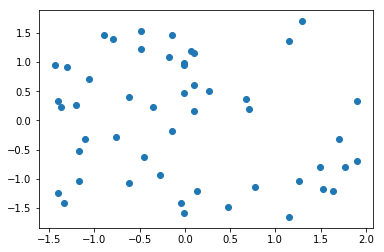

In [13]:
X2[:,0] = (X2[:,0] - np.mean(X2[:,0])) / np.std(X2[:,0])
X2[:,1] = (X2[:,1] - np.mean(X2[:,1])) / np.std(X2[:,1])
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [14]:
print(np.mean(X2[:,0]))
print(np.std(X2[:,0]))
print(np.mean(X2[:,1]))
print(np.std(X2[:,1]))

1.2434497875801754e-16
0.9999999999999998
1.0103029524088925e-16
1.0


### 如何对测试数据集进行归一化

- 使用训练集的均值和方差来归一化测试集数据

$$x_{test\_scale} = \frac{x_{test} - x_{mean\_train}}{S_{train}}$$

**测试数据是模拟真实环境**
- 真实环境很有可能无法得到所有测试数据的均值和方差
- 对数据的归一化也是算法的一部分

**我们需要保存训练数据集得到的均值和方差**

### scikit-learn 中使用 Scaler 来归一化

In [15]:
from sklearn import datasets

In [16]:
iris = datasets.load_iris()

In [17]:
X = iris.data
y = iris.target

In [18]:
X[:10,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

### scikit-learn 中的 StandardScaler

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
stdScaler = StandardScaler()

In [22]:
stdScaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [23]:
stdScaler.mean_

array([5.83416667, 3.0825    , 3.70916667, 1.16916667])

In [24]:
stdScaler.scale_

array([0.81019502, 0.44076874, 1.76295187, 0.75429833])

In [25]:
X_train_std = stdScaler.transform(X_train)
X_test_std = stdScaler.transform(X_test)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
kNN_clf = KNeighborsClassifier(n_neighbors=3)
kNN_clf.fit(X_train_std, y_train)
kNN_clf.score(X_test_std, y_test)

1.0